## Random Matrix Testing

In [1]:
import qutip as qt
import qutip.states as qts
import qutip.operators as qto
import qutip.states as qts
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import seaborn as sns
from functools import reduce

sys.path.append("../dwaveutils/dwavetools")
sys.path.append("../dwaveutils/probrep")
from dictrep import DictRep
from dwavetools import nqubit_1pauli, nqubit_2pauli, loadAandB, dict_to_qutip, s_of_t

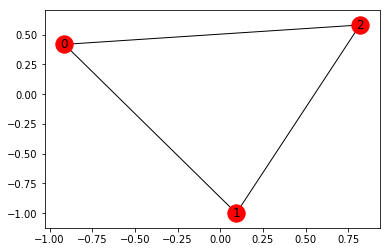

In [2]:
# Form a dictionary representation of a problem
dictparams = {(0, 0): 0.1, (1, 1): 0.1, (2, 2): 0.1, (0, 1): -0.1, (1, 2): -0.1, (0, 2): 0.1}
problem1 = DictRep(H = dictparams, qpu = 'simulate', vartype = 'ising', encoding = "logical")
problem1.visualize_graph()

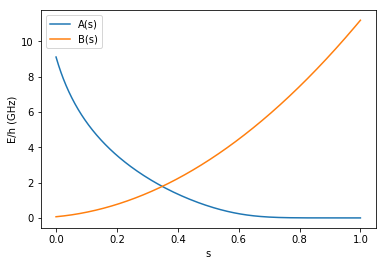

In [3]:
svals, Afunc, Bfunc = loadAandB()
plt.figure()
plt.plot(svals, Afunc(svals), label='A(s)')
plt.plot(svals, Bfunc(svals), label='B(s)')
plt.legend()
plt.xlabel('s')
plt.ylabel('E/h (GHz)')
plt.show()

In [24]:
def make_dwaveH(dictrep, s_of_t, filename=None):
    """
    Makes the full time-dependent (via s) TFIM of D-Wave from DictRep H
    that only encodes the final annealing Hamiltonian
    """
    # first, get A(s) and B(s) functions
    if filename:
        svals, Afunc, Bfun = loadAandB(filename)
    else:
        svals, Afunc, Bfunc = loadAandB()
        
    # next, construct the final Hamiltonian encoded in DictRep
    HZ = dict_to_qutip(dictrep)
    
    # then, construct HX initial Hamiltonian
    nqbits = len(dictrep.qubits)
    HX = sum([nqubit_1pauli(qto.sigmax(), m, nqbits) for m in range(nqbits)])
    
    # finally, make the total Hamiltonian
    Hfinal = [[HX, Afunc], [HZ, Bfunc]]
    
    return Hfinal

In [25]:
make_dwaveH(problem1)

[[Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
  Qobj data =
  [[0. 1. 1. 0. 1. 0. 0. 0.]
   [1. 0. 0. 1. 0. 1. 0. 0.]
   [1. 0. 0. 1. 0. 0. 1. 0.]
   [0. 1. 1. 0. 0. 0. 0. 1.]
   [1. 0. 0. 0. 0. 1. 1. 0.]
   [0. 1. 0. 0. 1. 0. 0. 1.]
   [0. 0. 1. 0. 1. 0. 0. 1.]
   [0. 0. 0. 1. 0. 1. 1. 0.]],
 [Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
  Qobj data =
  [[ 0.2  0.   0.   0.   0.   0.   0.   0. ]
   [ 0.   0.   0.   0.   0.   0.   0.   0. ]
   [ 0.   0.   0.4  0.   0.   0.   0.   0. ]
   [ 0.   0.   0.  -0.2  0.   0.   0.   0. ]
   [ 0.   0.   0.   0.   0.   0.   0.   0. ]
   [ 0.   0.   0.   0.   0.   0.2  0.   0. ]
   [ 0.   0.   0.   0.   0.   0.  -0.2  0. ]
   [ 0.   0.   0.   0.   0.   0.   0.  -0.4]],

In [113]:
results = qt.sesolve(make_dwaveH(problem1), qts.ket([0, 0, 0]), [0, 0.3])

In [114]:
amps = np.array([abs(results.states[1][i])**2 for i in range(8)])

<BarContainer object of 8 artists>

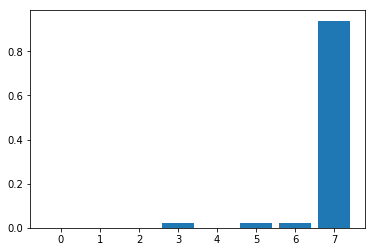

In [115]:
plt.bar([0, 1, 2, 3, 4, 5, 6, 7], amps.flatten())

In [99]:
datapd = pd.Series(amps.flatten())
datapd

0    0.000057
1    0.001638
2    0.000989
3    0.033899
4    0.001638
5    0.035122
6    0.033899
7    0.892759
dtype: float64

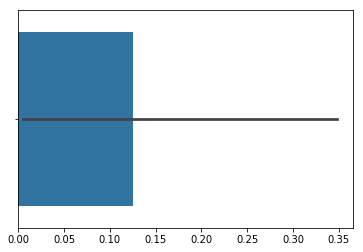

In [95]:
sns.barplot(datapd)